<span style='background:yellow'>NOTES</span>
- Het CBS geeft gedetailleerde gegevens over de Nederlandse situatie. Gebruik ik deze dataset: https://www.cbs.nl/nl-nl/maatwerk/2021/37/lichaamslengte?
Of deze: https://www.cbs.nl/nl-nl/nieuws/2021/37/nederlanders-korter-maar-nog-steeds-lang#:~:text=21%20procent%20van%20de%20mannen%20langer%20dan%20190%20cm&text=In%202020%20is%20ruim%20een,dan%20175%20cm.
een notitie hierbij is dat de data voortkomt uit zelfrapportage? Voor verschillende landen is de data mogelijk op verschillende manieren verzameld.
- voorbeeld: https://ourworldindata.org/human-height#:~:text=Globally%2C%20the%20mean%20height%20of,versus%20159%20cm%20for%20women.
- achtergrond bij de NCD dataset: https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31859-6/fulltext<br> DOI: https://doi.org/10.1016/S0140-6736(20)31859-6
- package voor grapher: https://github.com/owid/owid-grapher-py


# Dutch people are the tallest people in the world, but for how long?

Last year it made the Dutch [news](https://www.volkskrant.nl/wetenschap/nederlanders-worden-niet-langer-ze-worden-juist-kleiner~bd7fbba7/?referrer=https%3A%2F%2Fwww.google.com%2F) that us Dutch people are no longer growing taller, but we are getting smaller. In this notebook I want to visualize the trends in average height for Dutch people over the years, and compare this with data from the rest of the world. On average, Dutch people are still the tallest people in the world, but for how long?

In [1]:
# main packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# gebruik ik alle packages? Moeten er meer bij?

## Questions

-	Wat is de ontwikkeling van de gemiddelde lengte van Nederlanders door de jaren heen? 
-	Is de groei inderdaad gestagneerd? En hoe zien we dit?
-	In welke leeftijdsgroep(en) zien we deze eventuele stagnatie terug?
-	Is er een verschil tussen mannen en vrouwen?
-	Hoe verhoudt de ontwikkeling in Nederland zich tot de ontwikkeling in andere landen? 
-	Is er voor meer landen een stagnatie in gemiddelde lengte te zien? 
-	Zijn er landen waar de gemiddelde lengte nog groeit?
-   Is er in scandinavische landen, waar er grotere gelijkheid is, bijvoorbeeld minder verschil tussen mannen en vrouwen

## Datasets

I'm using two datasets from NCD Risk Factor Collaboration (NCD-RisC).

- Dataset containing mean heights (in centimeters) split out in boys/girls and age groups 5 to 19 for 199 countries for the years 1985-2019 (210,000 records). 
    - Link: https://www.ncdrisc.org/data-downloads-height.html
    - Filename: NCD_RisC_Lancet_2020_height_child_adolescent_country.csv

- Dataset containing mean height of men and women aged 18 or older by birth year, extending from 1896 to 1996. how many countries?
    - Link: https://ourworldindata.org/human-height#:~:text=Globally%2C%20the%20mean%20height%20of,versus%20159%20cm%20for%20women. (originating from NCD-Risc)
    - Filename: average-height-by-year-of-birth.csv

I will first take a look at the datasets, check them, and prepare them for further analysis.

### <span style='color:Lightblue'> *Checking & Preparing of Data* </span>


Wat wordt er allemaal wel en niet beschreven? Welke periode? Welke gegevens? Welke leeftijden? hoeveel landen<br>
Zijn er speciale eigenaardigheden aan de datasets?<br>
Voeg de datasets samen zodat de data tot en met 2019 wordt aangevuld.
voeg nieuwe kolom toe met ranking
grapher - laat de groei over de jaren zien.

In [13]:
# We importeren de data en bekijken de eerste en laatste rijen om een impressie te krijgen.
NCD_height_child_adolescent_country = pd.read_csv("NCD_RisC_Lancet_2020_height_child_adolescent_country.csv")
NCD_height_child_adolescent_country.head(10)

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Afghanistan,Boys,1985,5,103.315204,92.912414,113.712811,5.295555
1,Afghanistan,Boys,1985,6,109.235659,99.914439,118.282644,4.718901
2,Afghanistan,Boys,1985,7,114.759466,106.310048,123.003367,4.270250
3,Afghanistan,Boys,1985,8,120.002304,112.202520,127.549987,3.924385
4,Afghanistan,Boys,1985,9,125.077305,117.880359,132.153791,3.662401
5,Afghanistan,Boys,1985,10,130.096397,123.381371,136.741836,3.465345
6,Afghanistan,Boys,1985,11,135.252323,128.835664,141.672909,3.320590
7,Afghanistan,Boys,1985,12,141.084120,134.813134,147.268071,3.213107
8,Afghanistan,Boys,1985,13,147.828730,141.782889,153.827396,3.126279
9,Afghanistan,Boys,1985,14,154.131219,148.159206,160.011242,3.053421


We bekijken de laatste rijen.

In [3]:
NCD_height_child_adolescent_country.tail(10)

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
209990,Zimbabwe,Girls,2019,10,136.157033,133.251537,139.086575,1.489183
209991,Zimbabwe,Girls,2019,11,142.558515,140.004469,145.196292,1.326090
209992,Zimbabwe,Girls,2019,12,148.340205,146.099937,150.628614,1.174324
209993,Zimbabwe,Girls,2019,13,152.506849,150.529918,154.509605,1.029716
209994,Zimbabwe,Girls,2019,14,155.243385,153.528327,156.997730,0.896115
209995,Zimbabwe,Girls,2019,15,156.994944,155.459365,158.533808,0.787586
209996,Zimbabwe,Girls,2019,16,158.066542,156.678653,159.485423,0.721662
209997,Zimbabwe,Girls,2019,17,158.724366,157.376912,160.097738,0.691562
209998,Zimbabwe,Girls,2019,18,159.220151,157.883096,160.558243,0.681809
209999,Zimbabwe,Girls,2019,19,159.849064,158.382094,161.283973,0.732247


We kunnen zien dat er 200 landen in de dataset staan. (of 199? omdat de kolomnamen ook worden meegeteld?) 

In [4]:
NCD_countries = NCD_height_child_adolescent_country.value_counts(subset=["Country"])
print(NCD_countries)

Country    
Afghanistan    1050
Panama         1050
Nicaragua      1050
Niger          1050
Nigeria        1050
               ... 
Ghana          1050
Greece         1050
Greenland      1050
Grenada        1050
Zimbabwe       1050
Length: 200, dtype: int64


Voor het jaar 2019: sorteer jongens van 19 jaar van hoog naar laag. Print de top 10 en laatste 10. (vergelijk dit met de kaggle data, is dat dezelfde?)

In [5]:
# We sorteren van hoog naar laag
NCD_2019_19_boys = NCD_height_child_adolescent_country.loc[(NCD_height_child_adolescent_country ["Age group"] == 19) & (NCD_height_child_adolescent_country ["Year"] == 2019) & (NCD_height_child_adolescent_country ["Sex"] == "Boys")]
NCD_2019_19_ordered_boys = NCD_2019_19_boys.sort_values(by=["Mean height"], ascending=False)
NCD_2019_19_ordered_boys.head(10)
# kan er een column "Rank" worden toegevoegd?

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
66149,Netherlands,Boys,2019,19,183.782394,181.542768,186.192941,1.203612
62474,Montenegro,Boys,2019,19,183.302155,181.726266,184.926153,0.809012
31499,Estonia,Boys,2019,19,182.790703,180.930243,184.699383,0.958836
12599,Bosnia and Herzegovina,Boys,2019,19,182.473961,179.414454,185.651414,1.599755
42524,Iceland,Boys,2019,19,182.101575,178.350823,185.829059,1.901850
26249,Denmark,Boys,2019,19,181.892659,181.131191,182.652833,0.385849
25724,Czech Republic,Boys,2019,19,181.186635,179.464056,182.911245,0.877328
51449,Latvia,Boys,2019,19,181.171117,177.497049,184.908825,1.912029
84524,Slovakia,Boys,2019,19,181.015487,179.194789,182.797112,0.910072
85049,Slovenia,Boys,2019,19,180.977413,180.418954,181.550041,0.288398


In [6]:
NCD_2019_19_ordered_boys.tail(10)

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
55649,Madagascar,Boys,2019,19,165.161875,160.583871,169.721833,2.355050
7874,Bangladesh,Boys,2019,19,165.081478,163.706385,166.494526,0.717199
103949,Yemen,Boys,2019,19,164.416447,161.735292,167.148768,1.380092
65624,Nepal,Boys,2019,19,164.363776,162.769942,165.963518,0.811128
38849,Guatemala,Boys,2019,19,164.357512,161.850372,166.904600,1.302914
63524,Mozambique,Boys,2019,19,164.296762,161.987193,166.732806,1.188598
72974,Papua New Guinea,Boys,2019,19,163.097954,159.626258,166.622227,1.783672
85574,Solomon Islands,Boys,2019,19,163.069444,160.685657,165.434763,1.204239
50924,Lao PDR,Boys,2019,19,162.780592,159.896374,165.700242,1.476293
93974,Timor-Leste,Boys,2019,19,160.130543,158.044330,162.208359,1.077616


Ik doe hetzelfde voor de meisjes. Kan deze data ook in 1 tabel?

In [7]:
NCD_2019_19_girls = NCD_height_child_adolescent_country.loc[(NCD_height_child_adolescent_country ["Age group"] == 19) & (NCD_height_child_adolescent_country ["Year"] == 2019) & (NCD_height_child_adolescent_country ["Sex"] == "Girls")]
NCD_2019_19_ordered_girls = NCD_2019_19_girls.sort_values(by=["Mean height"], ascending=False)
NCD_2019_19_ordered_girls.head(10)

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
171149,Netherlands,Girls,2019,19,170.361211,168.334748,172.387845,1.035536
167474,Montenegro,Girls,2019,19,169.960883,168.282462,171.784375,0.888751
131249,Denmark,Girls,2019,19,169.470606,168.393430,170.565079,0.560934
147524,Iceland,Girls,2019,19,168.913484,165.838991,172.042042,1.576388
156449,Latvia,Girls,2019,19,168.806628,165.906652,171.669956,1.477585
136499,Estonia,Girls,2019,19,168.662760,167.347028,169.982764,0.671394
187424,Serbia,Girls,2019,19,168.285067,166.773404,169.858638,0.783122
130724,Czech Republic,Girls,2019,19,167.963476,166.581442,169.376792,0.705181
159074,Lithuania,Girls,2019,19,167.629892,165.073050,170.264026,1.322391
107099,American Samoa,Girls,2019,19,167.551522,164.044109,170.874128,1.737097


### <span style='color:Lightblue'> *De CBS dataset* </span>
Deze dataset bevat ook gegevens voor 2020. 

## Visualisaties/vragen nader bekeken (maak tzt een selectie)

### <span style='color:Lightblue'> *Geografische visualisaties* </span>

GEO:
om kaarten te maken moet de data denk ik worden voorbereid: 1 tabel met per land man + vrouw (neem hiervoor 19 jaar als uitgangspunt) + de landcode? + de regiocode(?)
https://www.kaggle.com/nguyenngocphung/height-by-country-eda-map-visualization/data


### <span style='color:Lightblue'> *Meer* </span>

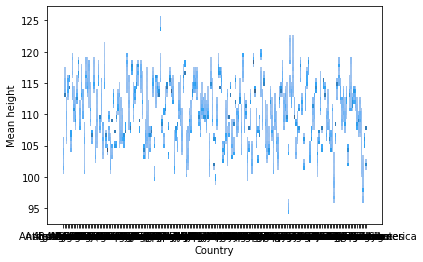

In [8]:
# ik selecteer eerst age group 5 in 2019. Dit is helemaal niet overzichtelijk. Hoe maak he zit overzichtelijker?
# dit is data van jongens en meisjes tezamen??
NCD_age_5 = NCD_height_child_adolescent_country[(NCD_height_child_adolescent_country['Age group'] == 5)] 
sns.histplot(data=NCD_age_5, x="Country", y="Mean height");

We kunnen dit ook plotten over de jaren heen, dus age group 5 van 1985 tot 2019. Zit daar een verschuiving in?

We kijken als voorbeeld naar de lengte-verdeling(?) van Nederlandse jeugd. De grafiek voor elke leeftijdsgroep de gemiddelde lengte zien in 2019.

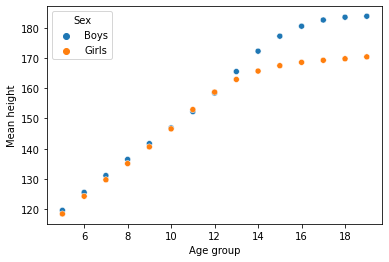

In [9]:
NCD_NL = NCD_height_child_adolescent_country[(NCD_height_child_adolescent_country['Country'] == "Netherlands") & (NCD_height_child_adolescent_country['Year'] == 2019)] 
sns.scatterplot(data=NCD_NL, x="Age group", y="Mean height", hue="Sex");

voorbeeld:
https://ourworldindata.org/human-height#:~:text=Globally%2C%20the%20mean%20height%20of,versus%20159%20cm%20for%20women.


We vergelijken de gemiddelde lengtes van 19-jarigen van all 200 landen.

Zie hier een voorbeeld voor het presenteren van data over cohorten: https://elifesciences.org/articles/13410/figures#content
check de seaborn gallery voor voorbeelden. seaborn.pydata.org/examples/index.html          

In [10]:
# we maken een dataframe met de landen gesorteerd van hoogste gemiddelde naar laagste in 2019.

Een grafiek met al deze data is niet heel overzichtelijk.

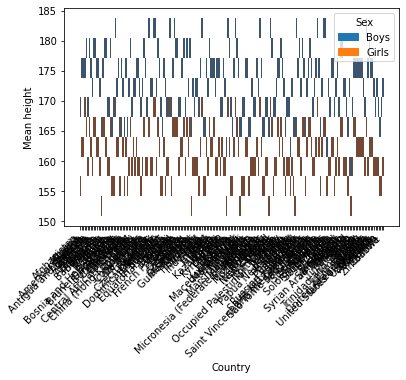

In [11]:
# kan dit ook in een grafiek? hoe maak je dit inzichtelijker?
NCD_allcountries_19 = NCD_height_child_adolescent_country[(NCD_height_child_adolescent_country['Age group'] == 19) & (NCD_height_child_adolescent_country['Year'] == 2019)] 
sns.histplot(data=NCD_allcountries_19, x="Country", y="Mean height", hue="Sex")
plt.xticks(rotation = 45, ha = 'right');

We kijken naar de hoogste en laagste 10 landen.

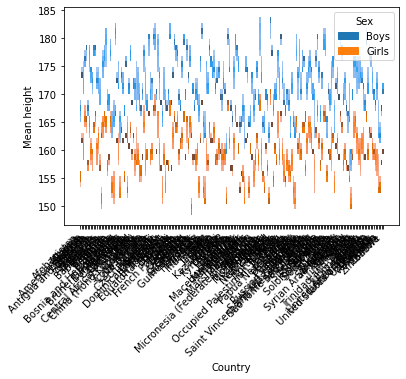

In [12]:
NCD_allcountries_19 = NCD_height_child_adolescent_country[(NCD_height_child_adolescent_country['Age group'] == 19)] 
sns.histplot(data=NCD_allcountries_19, x="Country", y="Mean height", hue="Sex")
plt.xticks(rotation = 45, ha = 'right');

Meer vragen:
In welke landen zie je de grootste groei?
Is er overal een verschil tussen meisjes en jongens?
Waar is het verschil tussen meisjes en jongens het grootst en waar het kleinst?


maak ook een normaalverdeling/bellcurve voor alle data.

Wereldwijde trend in grafiek. We laten in een grafiek de gemiddelde leeftijd zien van 5-jarige, 10-jarige en 19-jarige jongens en meisjes wereldwijd.

Zie ook dit voorbeeld van een kaart met de data: https://worldpopulationreview.com/country-rankings/average-height-by-country

## Voorspelling

trendanalyse hier toevoegn

## TOT SLOT: Nederlanders zijn het langste, maar hoe lang nog?
schrijf hier een korte samenvattende conclusie.
Zeg ook iets over het artikel in de Volkskrant: het is in het artikel onduidelijk over welk jaar ze spreken. De data is volgens mij allemaal uit 2019.